Press key... 


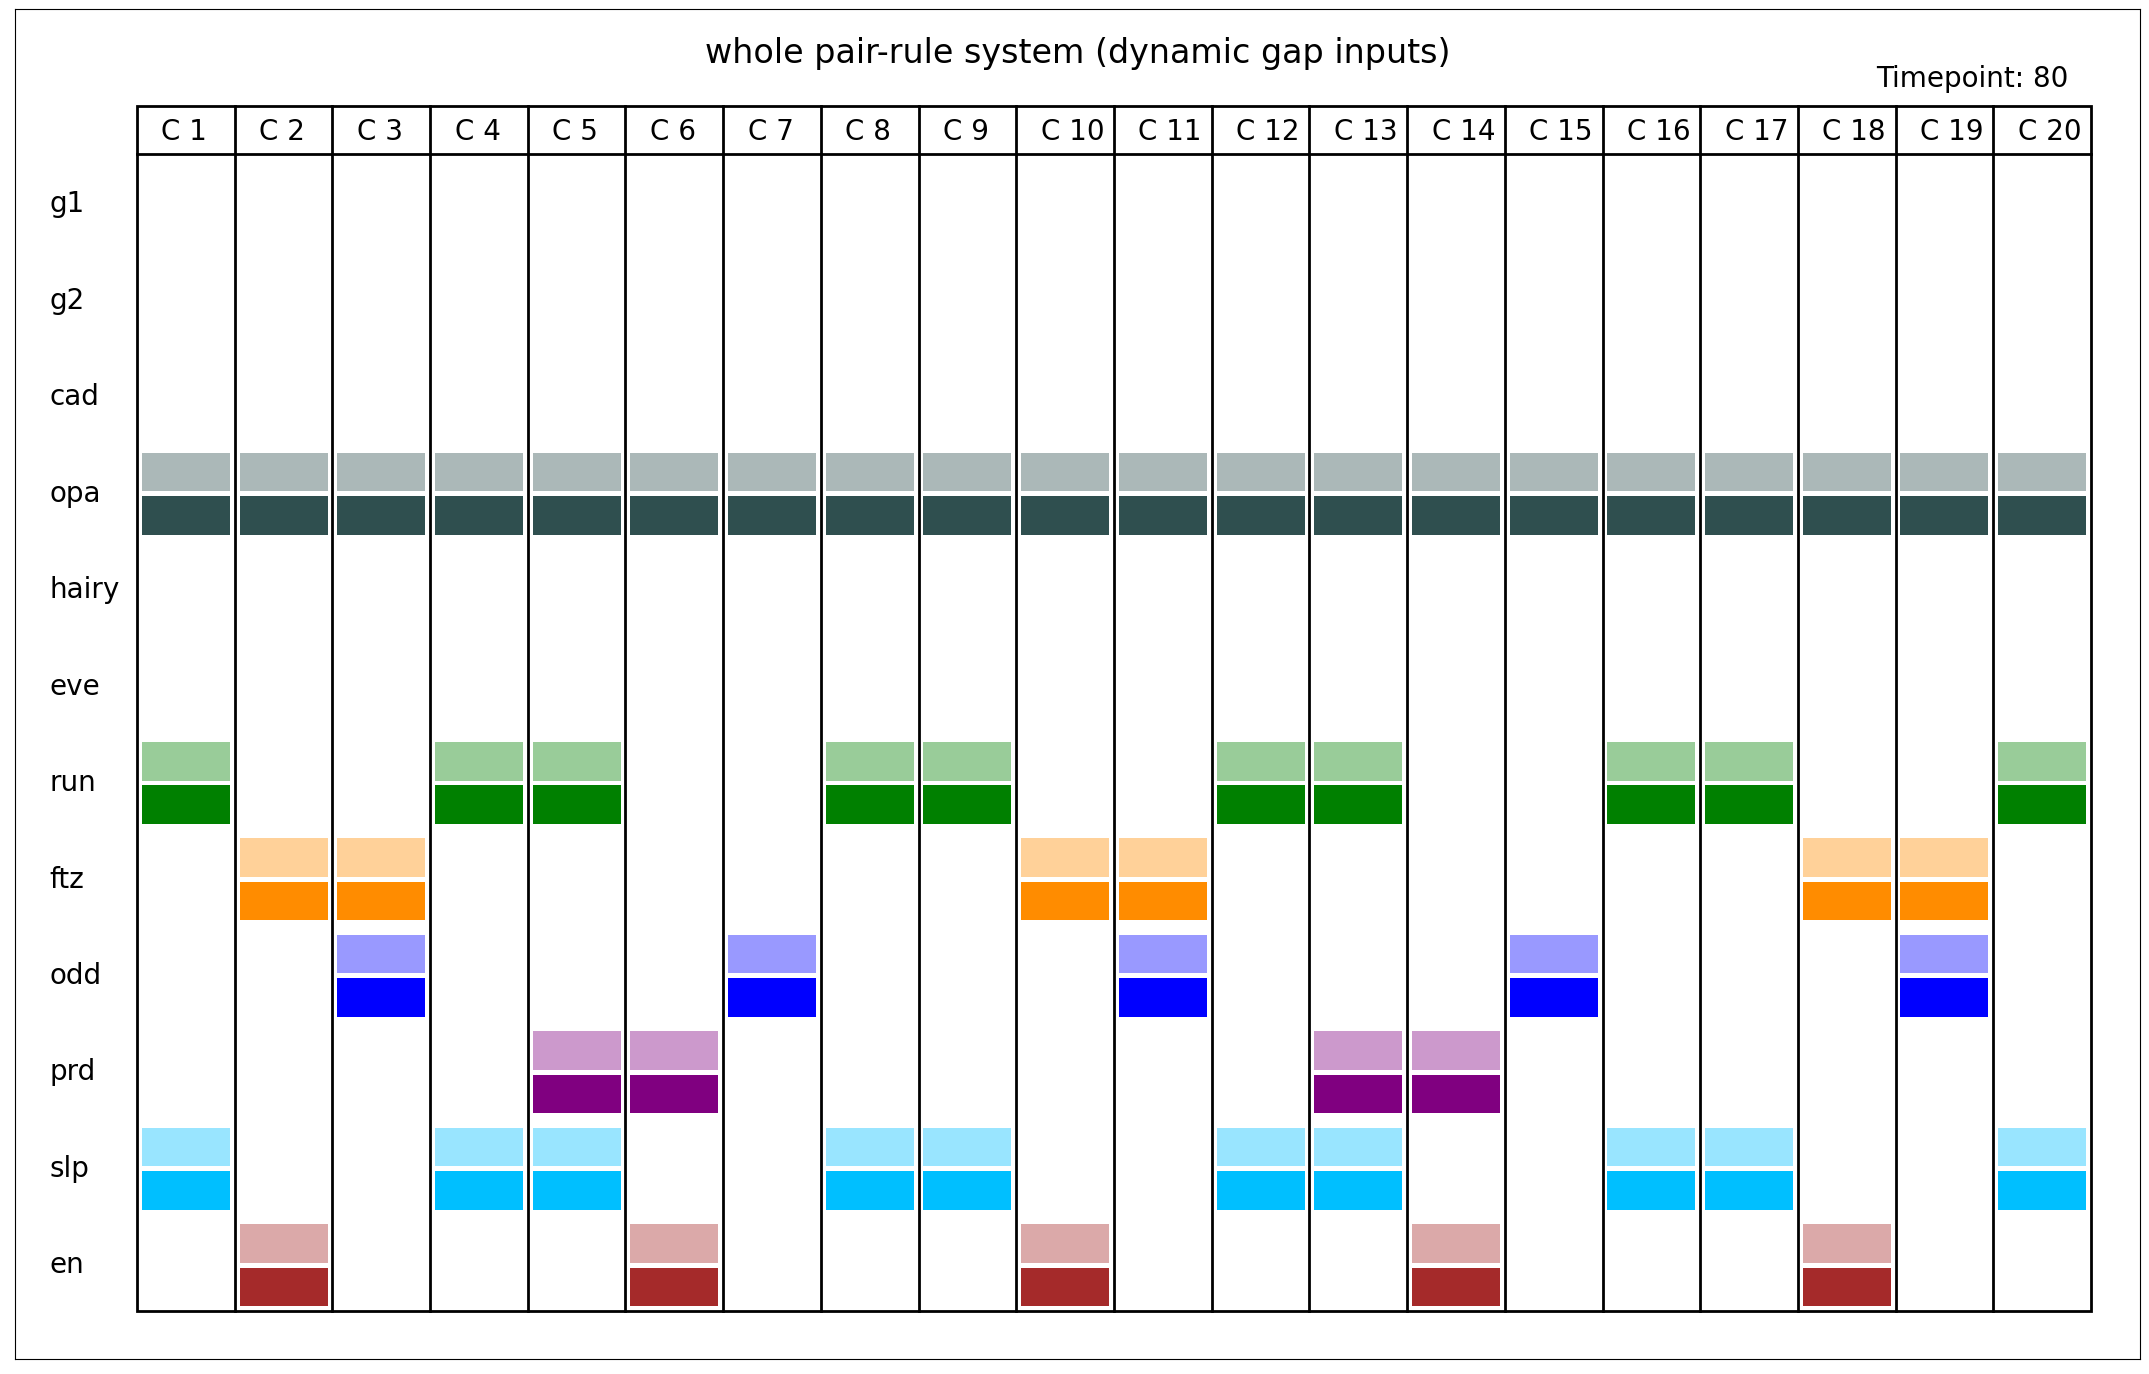

In [1]:
## This simulation corresponds to Simulation 10 in S2 Text (see also S10 Movie and Fig 2B)

# Import helper functions
from Clark1709Module import *

# Initialise each gene in network
g1 = Gene("g1")
g2 = Gene("g2")
cad = Gene("cad")
opa = Gene("opa")
eve = Gene("eve")
odd = Gene("odd")
run = Gene("run")
hairy = Gene("hairy")
ftz = Gene("ftz")
prd = Gene("prd")
slp = Gene("slp")
en = Gene("en")

# Define control logic functions for each gene
def g1_cl(s):
    if s["g1"] == 1 or s["opa"] == 1:
        return 0
    else:
        return 1

def g2_cl(s):
    if s["g2"] == 1 or s["opa"] == 1:
        return 0
    else:
        return 1

def cad_cl(s):
    return 0


def opa_cl(s):
    return 1

def eve_cl(s):
    if s["opa"] == 0:
        if s["g2"] == 1:
            return 0
        else:
            return 1
    else:
        if s["run"] == 1:
            return 0
        elif s["odd"] == 1:
            return 0
        elif s["slp"] == 1 and s["eve"] == 0:
            return 0
        elif s["en"] == 1:
            return 0
        else:
            return 1

def run_cl(s):
    if s["opa"] == 0:
        if s["odd"] == 1:
            return 0
        elif s["hairy"]==1:
            return 0
        else:
            return 1
    else:
        if s["eve"] == 1 and s["run"] == 0:
            return 0
        elif s["odd"] == 1 and s["run"] == 0:
            return 0
        elif s["en"] == 1:
            return 0
        else:
            return 1

def ftz_cl(s):
    if s["slp"] == 1:
        return 0
    elif s["opa"] == 0:
        if s["hairy"] == 1:
            return 0
        elif s["eve"] == 1:
            return 0
        else:
            return 1
    else:
        if s["ftz"] == 1:
            return 1
        else:
            return 0

def odd_cl(s):
    if s["slp"] == 1:
        return 0
    elif s["opa"] == 0:
        if s["eve"] == 1:
            return 0
        elif s["hairy"] == 1:
            return 0
        else:
            return 1
    else:
        if s["run"] == 1:
            return 0
        elif s["prd"] == 1 and s["odd"] == 0:
            return 0
        elif s["en"] == 1:
            return 0
        else:
            return 1

def hairy_cl(s):
    if s["opa"] == 0 and s["g1"] == 0:
        return 1
    else:
        return 0

def prd_cl(s):
    if s["cad"] == 1:
        return 0
    elif s["opa"] == 0:
            if s["eve"] == 1:
                return 0
            else:
                return 1
    else:
        if s["odd"] == 1:
            return 0
        elif s["prd"] == 1:
            return 1
        else:
            return 0
    

def slp_cl(s):
    if s["cad"] == 1:
        return 0
    elif s["eve"] == 1:
        return 0
    elif s["opa"] == 0:
        if s["prd"] == 0:
            return 0
        elif s["run"] == 1:
            return 0
        else:
            return 1
    else:
        if s["ftz"] == 1 and s["slp"] == 0:
            return 0
        elif s["en"] == 1:
            return 0
        elif s["odd"] == 1 and s["slp"] == 0:
            return 0
        else:
            return 1

def en_cl(s):
    if s["opa"] == 0:
        return 0
    else:
        if s["odd"] == 1:
            return 0
        elif s["slp"] == 1:
            return 0
        elif s["ftz"] == 1:
            return 1
        elif s["prd"] == 1 and s["run"] == 0:
            return 1
        else:
            return 0

# Assign control logic functions to each gene
g1.control_logic = g1_cl
g2.control_logic = g2_cl
cad.control_logic = cad_cl
opa.control_logic = opa_cl
hairy.control_logic = hairy_cl
eve.control_logic = eve_cl
run.control_logic = run_cl
ftz.control_logic = ftz_cl
odd.control_logic = odd_cl
prd.control_logic = prd_cl
slp.control_logic = slp_cl
en.control_logic = en_cl

# Initialise gene network
pr_system = Network()

# Add genes to network
pr_system.add_gene(g1)
pr_system.add_gene(g2)
pr_system.add_gene(cad)
pr_system.add_gene(opa)
pr_system.add_gene(hairy)
pr_system.add_gene(eve)
pr_system.add_gene(run)
pr_system.add_gene(ftz)
pr_system.add_gene(odd)
pr_system.add_gene(prd)
pr_system.add_gene(slp)
pr_system.add_gene(en)

# Update network (calculates state spaces etc)
pr_system.update()

# Initialise tissue (label, num cells, network)
embryo = Tissue("embryo", 20, pr_system)

# Choose gene colors
color_dict = {"g1":'black',
              "g2":'black',
              "cad":'orange',
              "opa":'darkslategray',
              "eve":'red',
              "run":'green',
              "ftz": 'darkorange',
              "odd":'blue',
              "hairy":'gold',
              "prd": 'purple',
              "slp": 'deepskyblue',
              "en": 'brown'}              
embryo.set_colors(color_dict)

# Set synthesis and decay time delays (gene name, s, d)
embryo.set_uniform_delays(6,6)
embryo.set_delays("g1", 18, 30)
embryo.set_delays("g2", 18, 30)
embryo.set_delays("cad", 6, 24)
embryo.set_delays("opa", 36, 6)


# Set initial conditions (gene name, list of initial states)
embryo.set_protein_state("cad", [1 for i in range(20)])
embryo.set_protein_state("g1", [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1])
embryo.set_rna_state("g1", [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0])
embryo.set_rna_ages("g1", [0, 6, 12, 0, 0, 0, 0, 0, 0, 6, 12, 0, 0, 0, 0, 0, 0, 6, 12, 0])
embryo.set_protein_ages("g1", [0, 0, 0, 0, 6, 12, 18, 24, 0, 0, 0, 0, 6, 12, 18, 24, 0, 0, 0, 0])
embryo.set_protein_state("g2", [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0])
embryo.set_rna_state("g2", [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1])
embryo.set_rna_ages("g2", [0, 0, 0, 6, 12, 0, 0, 0, 0, 0, 0, 6, 12, 0, 0, 0, 0, 0, 0, 6])
embryo.set_protein_ages("g2", [18, 24, 0, 0, 0, 0, 6, 12, 18, 24, 0, 0, 0, 0, 6, 12, 18, 24, 0, 0])

# Run and visualise simulation
title = "whole pair-rule system (dynamic gap inputs)"
embryo.simulate(title, 80)
embryo.animate(title, framedelay=100)


